# Créer un programme qui présente la vitesse d'un calcul

# Librairies   

In [1]:
from multiprocessing import Process
from threading import Thread
import os 
import math
import time

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Apprche Thread vs MultiProcessing

Syntaxe : os.cpu_count()

Paramètre : Aucun paramètre n'est requis.

Type de retour : Cette méthode renvoie une valeur entière qui indique le nombre de CPU dans le système. Aucune valeur n'est renvoyée si le nombre de CPU est indéterminé.

In [5]:
class Processus:
  processus = 'Thread'
  valeurs = [i for i in range(200)]

  

  def __init__(self, processus, valeurs):
    self.processus = processus
    self.valeurs = valeurs

  def run(self):
    dictionnaire = {"Processus" : [],
                    "Temps Debut": [],
                    "Temps Fin":[],}
    listProcessus = []
    if(self.processus=="Thread"):
      # --------------------------------------------------------Thread
      for i in range(os.cpu_count()):
        dictionnaire["Temps Debut"].append(time.time())
        dictionnaire["Processus"].append(f"P{i}")
        listProcessus.append(Thread(target=self.calcul))
      for thread in listProcessus:
        thread.start()
      for thread in listProcessus:
        thread.join()
        dictionnaire["Temps Fin"].append(time.time())
      dictionnaire["Temps Exécution"]= [dictionnaire["Temps Fin"][i]-dictionnaire["Temps Debut"][i] for i in range(len(dictionnaire["Temps Debut"]))]
      

    elif(self.processus=="Multiprocessing"):
      # --------------------------------------------------------Multiprocessing
      for i in range(os.cpu_count()):
        dictionnaire["Temps Debut"].append(time.time())
        dictionnaire["Processus"].append(f"P{i}")
        listProcessus.append(Process(target=self.calcul))
      for process in listProcessus:
        process.start()
      for process in listProcessus:
        process.join()
        dictionnaire["Temps Fin"].append(time.time())
      dictionnaire["Temps Exécution"]= [dictionnaire["Temps Fin"][i]-dictionnaire["Temps Debut"][i] for i in range(len(dictionnaire["Temps Debut"]))]
    self.plot(dictionnaire)


  def calcul(self):
    for i in self.valeurs:
      time.sleep(0.5)
      math.sqrt(i)

  def plot(self, dictionaire):
    data = pd.DataFrame(dictionaire)
    f, ax = plt.subplots(figsize =(12,10))
    ax.plot(data['Temps Exécution'], data['Processus'])
    ax.set_ylabel('Processus', fontsize=12)
    ax.set_xlabel('Temps Exécution', fontsize=12)
    ax.set_title(f'La vitesse de calcule Precesssus en fonction du temps', fontsize=15)
    plt.show()



# Test

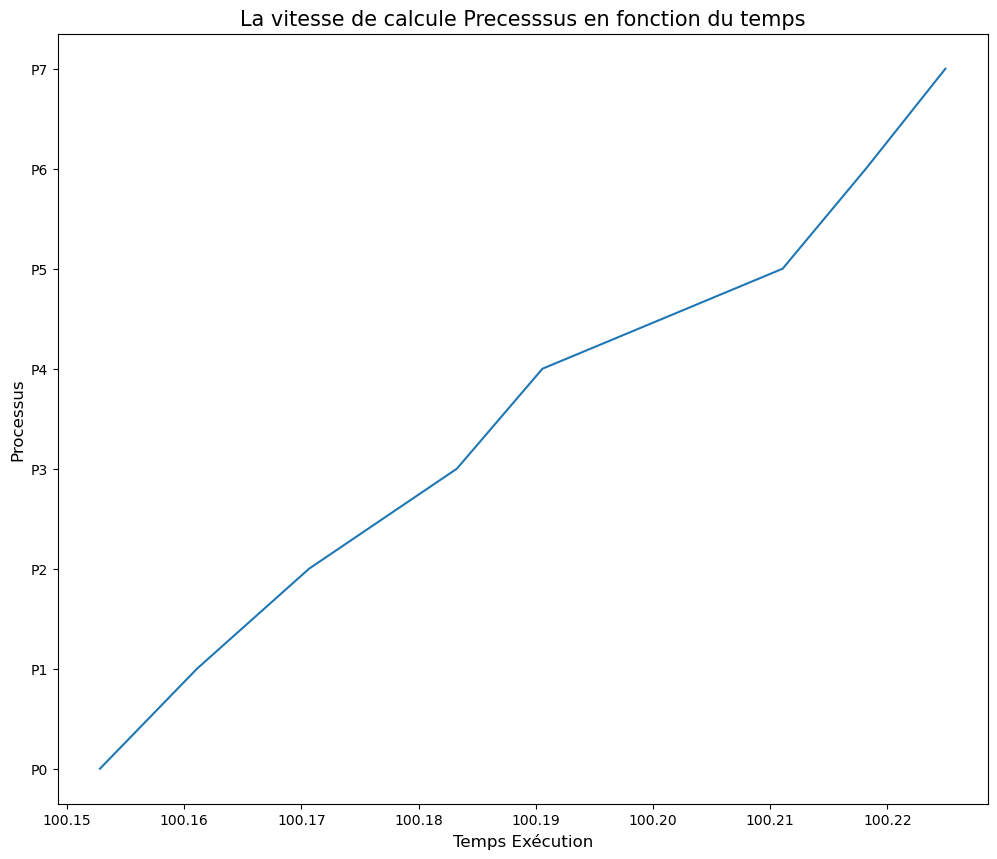

In [6]:
l  = [i for i in range(200)]
p1= Processus("Multiprocessing", l)
fig  = p1.run()